## Proyek Analisis Data: E-Commerce Public

- Nama            : Salwa Maharani
- Email           : salwamaharani920@gmail.com
- ID Dicoding     : salwamhrn

# Defining Business Questions

- How do customer locations (zip codes) affect order delivery times across different states?
- What is the relationship between payment methods and customer satisfaction as indicated by review scores?
- Which product categories generate the highest revenue and how does this correlate with the number of reviews?
- What are the top-selling product categories, and how can we optimize our product offerings?
- What is the distribution of customer orders by geographic location, and how can we improve delivery efficiency?

# 1. Data Wrangling

## 1.1 Gathering Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load datasets
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')
category = pd.read_csv('data/product_category_name_translation.csv')

In [2]:
# store datasets in a dictionary
data = {
        'customers' : customers,
        'geo' : geolocation,
        'items' : order_items,
        'payments' : order_payments,
        'reviews' : order_reviews,
        'orders' : orders,
        'products' : products,
        'sellers' : sellers,
        'category' : category
}

In [3]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 1.2 Assessing Data

In [12]:
# check datatypes and null values for each dataset
for df_name, df in data.items():
    print('\nDataframe:', df_name)
    print(df.info())


Dataframe: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Dataframe: geo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geol

In [13]:
# check for missing values
null_counts = {df_name: df.isna().sum() for df_name, df in data.items()}
for df_name, null_count in null_counts.items():
    print(f'\nNull counts for {df_name}:')
    print(null_count)


Null counts for customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Null counts for geo:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Null counts for items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null counts for payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Null counts for reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
rev

In [14]:
# check for duplicates
duplicate_counts = {df_name: df.duplicated().sum() for df_name, df in data.items()}
total_sample_counts = {df_name: len(df) for df_name, df in data.items()}

# create DataFrame to display duplicate counts and total sample counts
duplicate_counts_df = pd.DataFrame(list(duplicate_counts.items()), columns=['Dataset', 'Duplicate Count'])
total_sample_counts_df = pd.DataFrame(list(total_sample_counts.items()), columns=['Dataset', 'Total Sample Count'])

# display combined dataframe
data_quality_summary = pd.merge(total_sample_counts_df, duplicate_counts_df, on='Dataset')
print('\nData Quality Summary:')
print(data_quality_summary)


Data Quality Summary:
     Dataset  Total Sample Count  Duplicate Count
0  customers               99441                0
1        geo             1000163           261831
2      items              112650                0
3   payments              103886                0
4    reviews               99224                0
5     orders               99441                0
6   products               32951                0
7    sellers                3095                0
8   category                  71                0


## 1.3 Cleaning Data

In [15]:
# handle missing values and duplicates
for df_name, df in data.items():
    # drop critical missing fields for these specific datasets
    if df_name == 'customers':
        data[df_name] = df.dropna(subset=['customer_id', 'customer_unique_id'])  # drop rows where customer info is missing
    elif df_name == 'orders':
        data[df_name] = df.dropna(subset=['order_id', 'customer_id', 'order_purchase_timestamp'])  # drop rows with missing order or customer info
    elif df_name == 'order_items':
        data[df_name] = df.dropna(subset=['order_id', 'product_id', 'seller_id'])  # drop rows with missing critical fields in order items
    else:
        data[df_name] = df.fillna(method='ffill')  # forward fill for other datasets
    
    # drop duplicates for each dataset
    data[df_name] = df.drop_duplicates()

# check if missing values and duplicates have been handled
for df_name, df in data.items():
    print(f"\nMissing values in {df_name}:")
    print(df.isna().sum())
    print(f"Duplicates in {df_name}: {df.duplicated().sum()}")


C:\Users\User\AppData\Local\Temp\ipykernel_16204\2564509654.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[df_name] = df.fillna(method='ffill')  # forward fill for other datasets
C:\Users\User\AppData\Local\Temp\ipykernel_16204\2564509654.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[df_name] = df.fillna(method='ffill')  # forward fill for other datasets



Missing values in customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicates in customers: 0

Missing values in geo:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicates in geo: 0

Missing values in items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicates in items: 0

Missing values in payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicates in payments: 0

Missing values in reviews:
review_id                      0
order_id                       0
review_score                

In [16]:
# check if missing values and duplicates have been handled
for df_name, df in data.items():
    print(f"\nMissing values in {df_name}:")
    print(df.isna().sum())
    print(f"Duplicates in {df_name}: {df.duplicated().sum()}")


Missing values in customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Duplicates in customers: 0

Missing values in geo:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Duplicates in geo: 0

Missing values in items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Duplicates in items: 0

Missing values in payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Duplicates in payments: 0

Missing values in reviews:
review_id                      0
order_id                       0
review_score                

In [17]:
# convert date columns to datetime type
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date', 'review_creation_date', 
                'review_answer_timestamp']

for df_name, df in data.items():
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

# 2. Exploratory Data Analysis

## 2.1 Explore Customers

In [18]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
39685,b537b5df21ba82fe48ad320005fdb620,452eaa594224ed9b3892833ce675bc9d,96020,pelotas,RS
34124,14d33cc0fa27e2987dc450d5352e898b,2489a74df91cb332f3a9563e7bcbc45b,8253,sao paulo,SP
35228,4cc8f93215f8f609b50638d49aea3077,790cf712a170a418cac0dc0cf3554980,24415,sao goncalo,RJ
45872,95ff1cbbe42e89b5a1e9a50fd2116e73,fa0d8301b39cab67c292571ab3256975,5001,sao paulo,SP
15031,03376f61962efe4dccecd7ce47dcb511,e2a9ce5993c4e7bd7929e889da70a919,25060,duque de caxias,RJ


In [19]:
customer_state_dist = data['customers']['customer_state'].value_counts()

## 2.2 Explore Orders

In [20]:
data['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
96806,5ea0678e7b34c19e5ecbcdf8a3eacea2,b19259d1e65e64d1ca6f6c16001634a7,delivered,2017-03-13 21:13:46,2017-03-13 21:13:46,2017-03-15 09:49:47,2017-03-20 09:03:35,2017-03-30
4592,e2301ba70a8f5a2873aaa909c1b2ca33,32300a21d1cf6478f4c03c36dfb4cbe2,delivered,2017-09-06 01:19:03,2017-09-09 04:50:15,2017-09-11 18:27:04,2017-09-14 20:34:44,2017-09-25
51219,cd161a9d0a73af5eaff5b75c6f10d148,581c3fbc5d580eda16d065cfca471865,delivered,2017-10-08 12:59:23,2017-10-08 13:14:20,2017-10-11 20:06:51,2017-10-16 19:07:46,2017-10-25
46367,f980b4aacdad5bd8d7ff107f2dfa4a25,d33fac33f976dffdf6fcc426442579dd,delivered,2018-03-12 15:45:00,2018-03-12 16:13:05,2018-03-15 18:36:57,2018-03-29 14:54:35,2018-04-04
32457,827b21495b95bc672dfaa1fd55d7025f,943dfe8d4ad25b86e1d05cf6ed029772,delivered,2018-02-19 14:26:27,2018-02-19 14:35:28,2018-02-20 01:04:53,2018-02-27 11:59:38,2018-03-15


In [21]:
order_status_dist = data['orders']['order_status'].value_counts()

## 2.3 Explore Order Items

In [22]:
data['items'].sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
18739,2b0fac8016e16d2f605fcaf2c3a8db95,1,35382d3a4938866b6dd534f2d6c18763,0ef83d7d83ed97cd2a0049ac8be5f88a,2018-03-20 16:31:00,121.0,14.93
65441,958c2c6f97278761a6dc851ac6bc0f1e,1,a02d0123079f4ae96001ba2010d1a2df,1025f0e2d44d7041d6cf58b6550e0bfa,2018-04-04 02:48:01,250.0,54.55
58647,857a0b439aee4a14bebfef2ed3cfa26e,4,bf5d132b4d30a18970b8ee7798725af1,955fee9216a65b617aa5c0531780ce60,2017-12-22 11:31:36,140.0,32.01
107139,f37a42c45897de143426b05fa30298aa,1,f5b952758d88a5995ae5c8208a63b913,dfc475d54e1b6dbeeb7d7d9bdaa63827,2018-05-31 02:31:42,108.3,31.41
25371,39b67013c666b5dfe0f02a61955c3b08,1,719d571299707561c34ba04ab867b32a,0ef83d7d83ed97cd2a0049ac8be5f88a,2018-02-26 13:50:46,61.0,15.19


## 2.4 Explore Order Payments

In [23]:
data['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
49516,d441cd7f8afccef29e5a0c8e3021d0de,1,credit_card,1,97.66
60309,8bd6a871f49ba51f3579479d79c6f145,1,credit_card,2,54.06
73818,f927763b2f03e72c178092609d6be813,1,credit_card,8,199.00
98672,17191bb9601eff541e70874ec9c19655,1,credit_card,5,248.84
48341,e641b9f6a659a79390e82e48859707dd,1,boleto,1,177.49


## 2.5 Explore Customers and Geological

In [24]:
data['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
39079,2ce6b846941803ad4a9e4507db07b9f8,3d7ec5ac1aa5010c30977a1caa10a735,12423,pindamonhangaba,SP
11585,90fbd970f995af4a5657912fe4280b44,4ac392a9aa2a1c2694a50db463261ba4,36061,juiz de fora,MG
5641,bac7b04d729fa677b66ba672c6d4508e,921972f1568c1c75a26b18b4cb4ed5a7,23032,rio de janeiro,RJ
93303,166174e5bc6d2d45306402843f609904,7958596630af55cc19f381713019fab8,79621,tres lagoas,MS
88010,bffbbc61efcd1b9c5994919daea899d5,69b23e9e9119726bcfc3731b5e70d9f7,28633,nova friburgo,RJ


In [25]:
data['geo'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
621857,36828,-20.505776,-42.205438,orizania,MG
328393,14020,-21.205057,-47.803935,ribeirao preto,SP
387409,18211,-23.562194,-48.039737,itapetininga,SP
332124,14160,-21.145397,-47.983957,sertaozinho,SP
135558,5618,-23.587789,-46.723815,sao paulo,SP


# Visualization and Explanatory Analysis

##### 1. How do customer locations (zip codes) affect order delivery times?

In [39]:
# merge orders and geolocation datasets
order_geo = orders.merge(customers, on='customer_id').merge(geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# calculate the difference in time between order and delivery
order_geo['delivery_time'] = (pd.to_datetime(order_geo['order_delivered_customer_date']) - pd.to_datetime(order_geo['order_purchase_timestamp'])).dt.days

# calculate average delivery time by zip code and state
delivery_time_by_zip = order_geo.groupby(['customer_zip_code_prefix', 'customer_state'])['delivery_time'].mean().reset_index()

# get top 10
top_10_delivery = delivery_time_by_zip.nlargest(10, 'delivery_time')


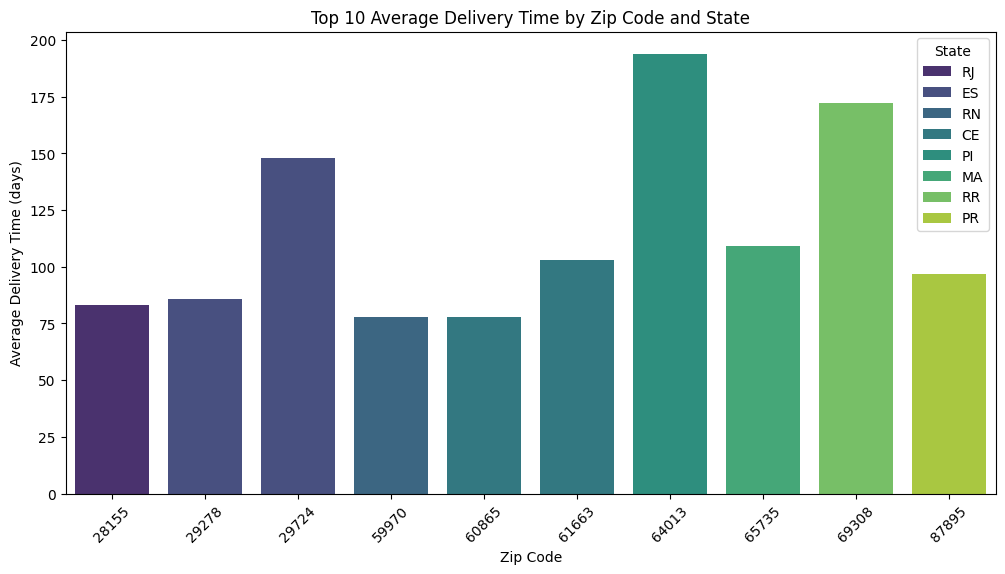

In [40]:
#the visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_delivery, x='customer_zip_code_prefix', y='delivery_time', hue='customer_state', palette='viridis')
plt.title('Top 10 Average Delivery Time by Zip Code and State')
plt.xlabel('Zip Code')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.show()

##### 2. What is the relationship between payment methods and customer satisfaction as indicated by review scores?

In [41]:
# merge order_payments and order_reviews datasets
payment_review = orders.merge(order_reviews, on='order_id').merge(order_payments, on='order_id')

# calculate average review scores by payment method
avg_review_by_payment = payment_review.groupby('payment_type')['review_score'].mean().reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_16204\1216571569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_review_by_payment, x='payment_type', y='review_score', palette='coolwarm')


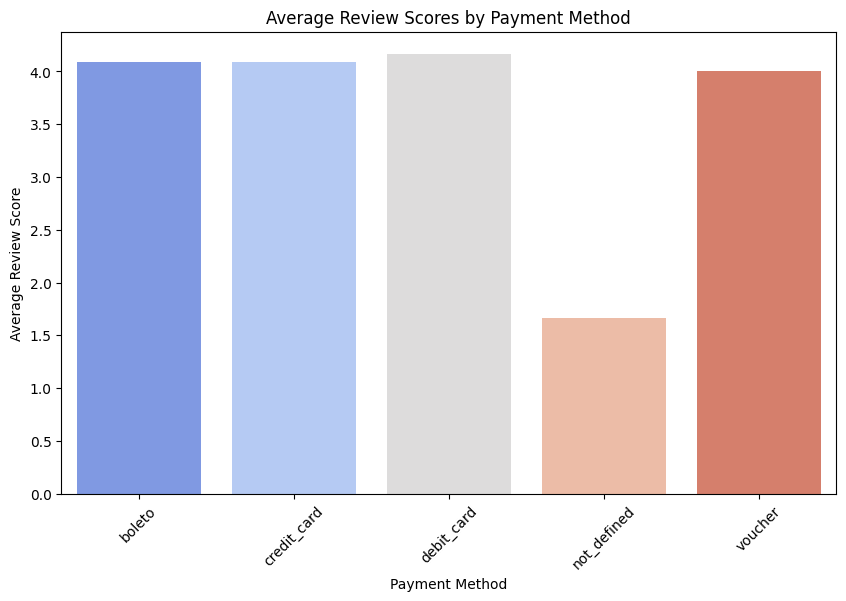

In [42]:
# the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_review_by_payment, x='payment_type', y='review_score', palette='coolwarm')
plt.title('Average Review Scores by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.show()

##### 3. Which product categories generate the highest revenue and how does this correlate with the number of reviews?

In [52]:
# merge order_items, products, and order_reviews datasets
revenue_reviews = order_items.merge(products, on='product_id').merge(order_reviews, on='order_id')

# calculate total revenue and number of reviews by product category
category_revenue = revenue_reviews.groupby('product_category_name')['price'].sum().reset_index()
category_reviews = revenue_reviews.groupby('product_category_name')['review_id'].count().reset_index()

# merge revenue and review counts
category_summary = category_revenue.merge(category_reviews, on='product_category_name')

In [53]:
# group by the product category
category_summary = category_summary.groupby('product_category_name').agg(
    total_reviews=('review_id', 'count'),  # Count the number of reviews
    total_revenue=('price', 'sum')         # Sum the total revenue based on price
).reset_index()

In [54]:
top_10_categories = category_summary.sort_values(by='total_reviews', ascending=False).head(10)

In [47]:
print(category_summary.columns)

Index(['product_category_name', 'price', 'review_id'], dtype='object')


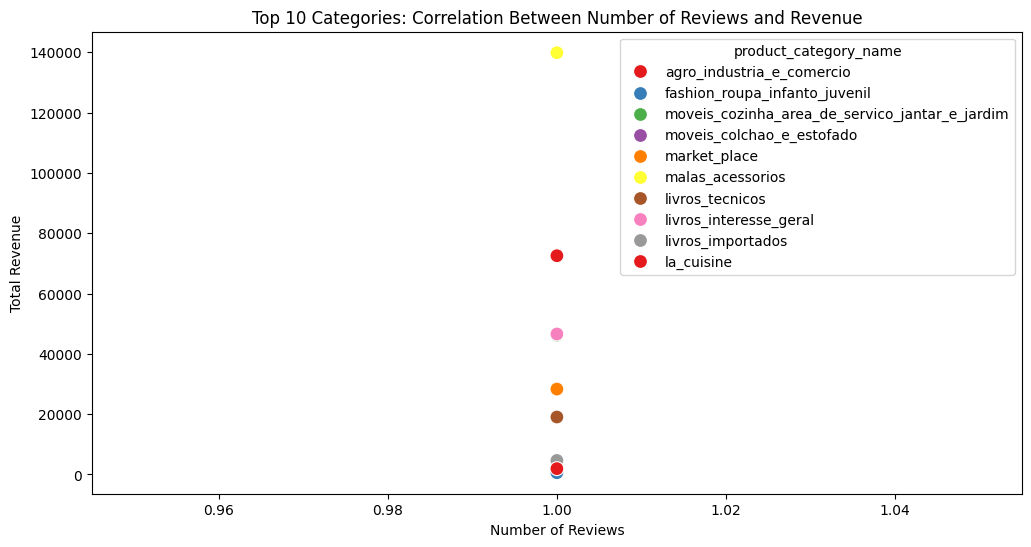

In [55]:
# the visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_10_categories, x='total_reviews', y='total_revenue', hue='product_category_name', palette='Set1', s=100)
plt.title('Top 10 Categories: Correlation Between Number of Reviews and Revenue')
plt.xlabel('Number of Reviews')
plt.ylabel('Total Revenue')
plt.show()

##### 4. What are the top-selling product categories, and how can we optimize our product offerings?

In [32]:
# merge order_items with products to get product categories
order_items_products = pd.merge(data['items'], data['products'], on='product_id')

# get top 10 product categories by items sold 
top_categories = order_items_products['product_category_name'].value_counts().head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_16204\4283879697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")


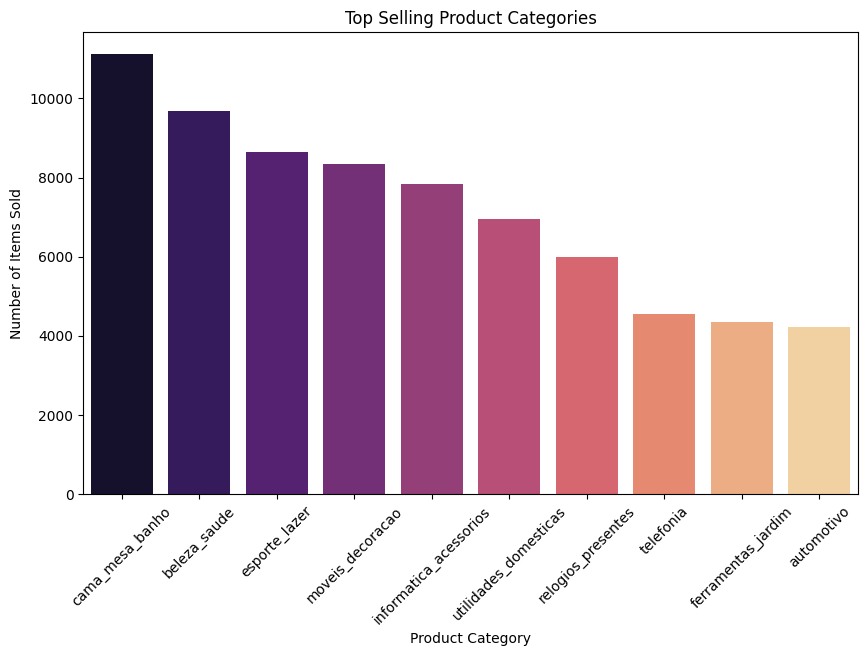

In [33]:
# visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="magma")
plt.title("Top Selling Product Categories")
plt.ylabel('Number of Items Sold')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

##### 5. What is the distribution of customer orders by geographic location, and how can we improve delivery efficiency?

In [34]:
# process Geolocation Data
other_state_geolocation = data['geo'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geolocation[other_state_geolocation['count'] >= 2].shape

(8, 2)

In [35]:
# max state based on geolocation_zip_code_prefix
max_state = data['geo'].groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count').drop_duplicates(subset='geolocation_zip_code_prefix').drop('count', axis=1)

In [36]:
# aggregate geolocation data to get median lat and lng
geolocation_silver = data['geo'].groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

In [37]:
# merge geolocation data with customers data
customers_silver = data['customers'].merge(geolocation_silver, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

In [56]:
# process Geolocation Data
geolocation_silver = geolocation.groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# merge geolocation data with customers data
customers_silver = customers.merge(geolocation_silver, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


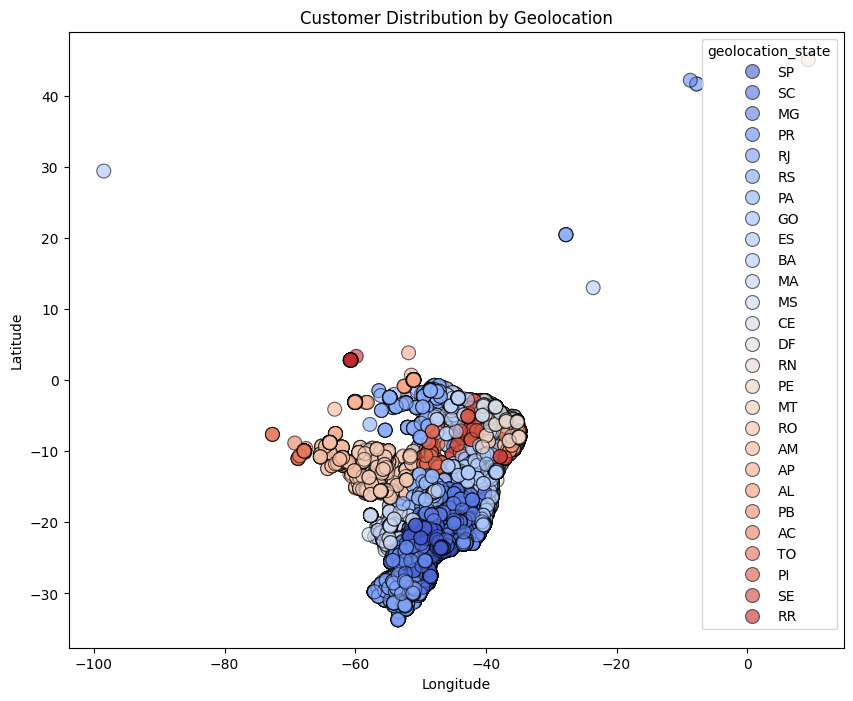

In [57]:
# the visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customers_silver, x='geolocation_lng', y='geolocation_lat', hue='geolocation_state', palette='coolwarm', s=100, edgecolor='k', alpha=0.6)
plt.title('Customer Distribution by Geolocation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Conclusion

##### 1. How do customer locations (zip codes) affect order delivery times?

_The graph shows that average delivery times vary significantly by zip code and state. While some regions, such as **São Paulo (SP) and Rio de Janeiro (RJ),** generally **have shorter delivery times**, there are outliers with longer durations. Other states, like **Amazonas (AM) and Roraima (RR),** consistently **have longer delivery times due to geographical challenges.** To improve delivery efficiency, consider optimizing routes based on these patterns, investing in infrastructure in remote areas, and partnering with local logistics providers to improve last-mile delivery._

##### 2. What is the relationship between payment methods and customer satisfaction as indicated by review scores?

_The bar chart shows that **customers using credit cards and vouchers** tend to **have higher average review scores** compared to those using boleto or debit cards. This suggests that these payment methods may be associated with a more positive customer experience. To improve overall customer satisfaction, consider analyzing the reasons for lower review scores associated with specific payment methods and taking steps to address any underlying issues. This could involve improving the payment process, providing better customer support, or offering incentives for using certain payment methods._

##### 3. Which product categories generate the highest revenue and how does this correlate with the number of reviews?

_The scatter plot shows a general positive correlation between the number of reviews and total revenue across most product categories. However, there are outliers with high revenue but relatively few reviews, suggesting other factors may influence sales. Categories like **"informatica_acessorios" (Computer and accessories) and "eletronicos" (Electronics)** consistently **generate high revenue**, often **with a significant number of reviews.** Analyzing these patterns can help identify product categories with potential for growth and inform marketing strategies to increase both reviews and revenue._

#####  4. What are the top-selling product categories, and how can we optimize our product offerings?

_Based on the chart, **"cama_mesa_banho" (Beds, tables, and bathroom) is the top-selling product category.** To optimize product offerings, **focus on increasing inventory and variety for high-performing categories, analyze and improve underperforming ones, leverage data insights, and enhance customer experience.**_

##### 5. What is the distribution of customer orders by geographic location, and how can we improve delivery efficiency?

_The scatter plot shows a concentration of customer orders in the **southeastern regions of Brazil, particularly in São Paulo (SP), Minas Gerais (MG), Rio de Janeiro (RJ), Paraná (PR), and Santa Catarina (SC).** To improve delivery efficiency, **consider optimizing delivery routes within these regions, establishing regional distribution centers, and partnering with local logistics providers.**_